In [1]:
%load_ext autoreload
%autoreload 2

import sys 
import os 
import cv2 

home = os.path.join('..','..')

pths = [os.path.join(home, 'pincam')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)
        
from pincam.utils import *
from pincam import Pincam 
from pincam.matrix_utils2 import MatrixUtils2 as mu

from ladybug_geometry.geometry2d.line import LineSegment2D

import matplotlib.pyplot as plt

r = lambda d: d / 180. * np.pi

In [11]:
# Define surfaces
bot_srf = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
top_srf = np.array(
    [[-5, -5, 10], [5, -5, 10], [5, 5, 10], [-5, 5, 10]])
y = 0
vrt_srf = np.array(
    [[-4, y, 0], [4, y, 0], [4, y, 6], [0, y, 10], [-4, y, 6]])
ptmtx = [bot_srf, top_srf, vrt_srf]

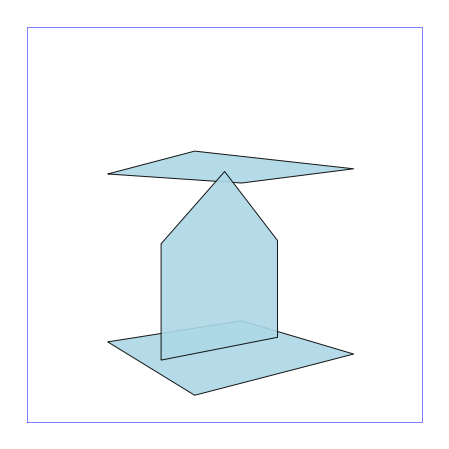

In [15]:
# Make camera
focal_length = 20
heading = r(145)
pitch = r(0)
cam_point = np.array([0, -25, 7])
cam = Pincam(cam_point, heading, pitch, focal_length)


res = 36
xptmtx, _depths = cam.project(cam.P, ptmtx)
depths, db = cam.depth_buffer(ptmtx, _depths, res=res)
xptmtx = np.array(xptmtx)[depths]
geos = [mu.shapely_from_srf3d(np.array(srf)) for srf in xptmtx]
df = gpd.GeoDataFrame({'geometry':geos})

f, a = plt.subplots(figsize=(8, 8))
a = df.plot(edgecolor='black', facecolor='lightblue', alpha=0.9, ax=a)
b = cam.sensor_plane_ptmtx_2d
a.plot(b[:,0], b[:,1], 'blue', lw=0.5)
_ = a.grid(False) 
_ = a.axis(False)

m = cam.ray_hit_matrix(cam.sensor_plane_ptmtx_3d, res=res)
#a.scatter(x=m[:,:,0], y=m[:,:,2], color='red',s=2)
# rnum = db.shape[1] - 1
# for i in db[:,:,2][::-1]:
#     for ii, j in enumerate(i):
#         fstr = '-' if j < 0 else str(int(j))
#         if ii == rnum: fstr += '\n'
#         print(fstr, end=' ')